# FEATURIZATION AND MODEL TUNING PROJECT


******************************************************************************

**Data Description**

The actual concrete compressive strength(MPa) for a given mixture under a specific age (days) was determined from laboaratory. Data is in raw form(not scaled). The data has 8 quantitative input variables, and 1 quantitaive output variable and 1030 instances (observations)

**Domain**

Cement Manufacturing

**Context**

Concrete is the most important in civil enginerring, The concrete compressive strength is a highly non linear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggreagate.

**Attribute** **Information**

* Cement           : measured in kg in a m3 mixture
* Blast            : measured in kg in a m3 mixture
* Fly ash          : measured in kg in a m3 mixture
* Water            : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Agrregate   : measured in kg in a m3 mixture
* Age              : day (1~365)
* Concrete compressive strength measured in Mpa

**Objective**

Modeling of strength of high performance concrete using Machine Learning

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

importing the data

In [2]:
df = pd.read_csv('/content/concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Summary of data

In [3]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


*Conclusions that can be made out of it:*

* all the features given in the data are numeric
* There are no NULL or NaN values present in the data
* In total there are 8 features and 1030 observations
* We shall be using strength as the dependent variable and all other features as independent variable as it makes the best sense out of the problem objective.
* Age value ranges from 1 to 365

# UNIVARIATE ANALYSIS

**Description of all the Independent variables**

1. **Cement**

In [5]:
print("Name of the attribute:", df.columns[0])
print("Range of values:", (df['cement'].max()-df['cement'].min()))
print("Mean value:", df['cement'].mean())
print("Median value:", df['cement'].median())
print("Standard deviation value:", df['cement'].std())
print("Quartiles values:")
print("1st Quartile", df['cement'].quantile(q=0.25))
print("3rd Quartile", df['cement'].quantile(q=0.75))

Name of the attribute: cement
Range of values: 438.0
Mean value: 281.1678640776698
Median value: 272.9
Standard deviation value: 104.50636449481536
Quartiles values:
1st Quartile 192.375
3rd Quartile 350.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


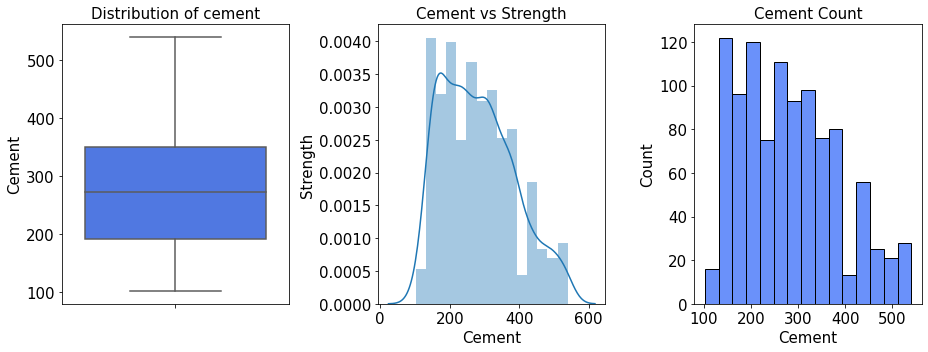

In [6]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.set_palette('rainbow')

#boxplot
sns.boxplot(y='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.set_title('Cement Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

2. **Slag**

In [7]:
print("Name of the attribute:", df.columns[1])
print("Range of values:", (df['slag'].max()-df['slag'].min()))
print("Mean value:", df['slag'].mean())
print("Median value:", df['slag'].median())
print("Standard deviation value:", df['slag'].std())
print("Quartiles values:")
print("1st Quartile", df['slag'].quantile(q=0.25))
print("3rd Quartile", df['slag'].quantile(q=0.75))

Name of the attribute: slag
Range of values: 359.4
Mean value: 73.89582524271844
Median value: 22.0
Standard deviation value: 86.2793417481054
Quartiles values:
1st Quartile 0.0
3rd Quartile 142.95


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


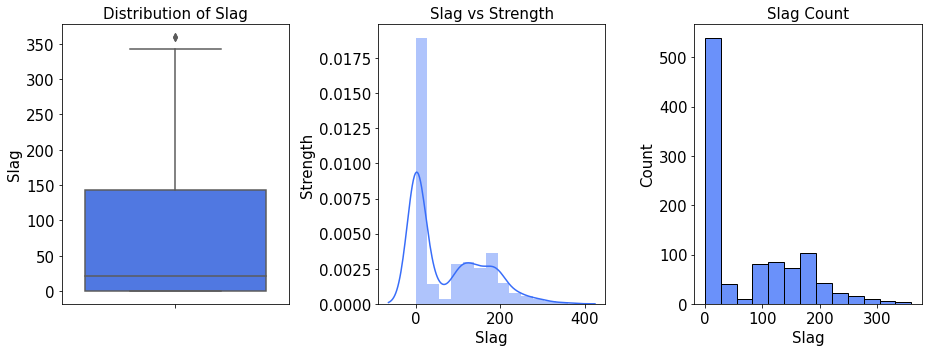

In [8]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='slag',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of Slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(x=df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.set_title('Slag Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

3. **Ash**

In [9]:
print("Name of the attribute:", df.columns[2])
print("Range of values:", (df['ash'].max()-df['ash'].min()))
print("Mean value:", df['ash'].mean())
print("Median value:", df['ash'].median())
print("Standard deviation value:", df['ash'].std())
print("Quartiles values:")
print("1st Quartile", df['ash'].quantile(q=0.25))
print("3rd Quartile", df['ash'].quantile(q=0.75))

Name of the attribute: ash
Range of values: 200.1
Mean value: 54.188349514563086
Median value: 0.0
Standard deviation value: 63.99700415268794
Quartiles values:
1st Quartile 0.0
3rd Quartile 118.3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


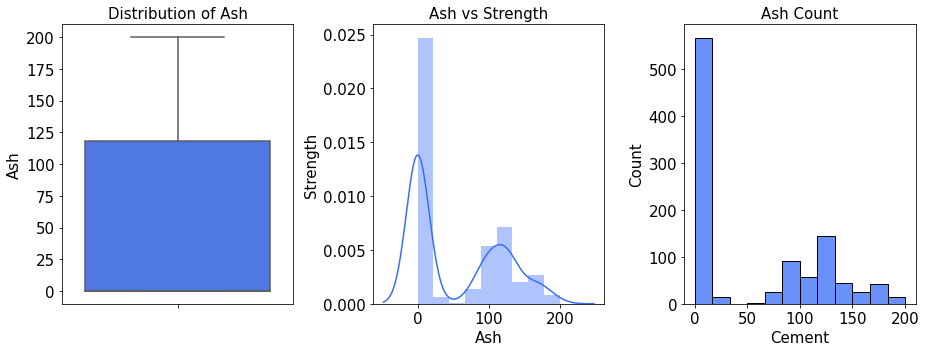

In [10]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='ash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of Ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['ash'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.set_title('Ash Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

4. **Water**

In [11]:
print("Name of the attribute:", df.columns[3])
print("Range of values:", (df['water'].max()-df['cement'].min()))
print("Mean value:", df['water'].mean())
print("Median value:", df['water'].median())
print("Standard deviation value:", df['water'].std())
print("Quartiles values:")
print("1st Quartile", df['water'].quantile(q=0.25))
print("3rd Quartile", df['water'].quantile(q=0.75))

Name of the attribute: water
Range of values: 145.0
Mean value: 181.56728155339798
Median value: 185.0
Standard deviation value: 21.35421856503245
Quartiles values:
1st Quartile 164.9
3rd Quartile 192.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


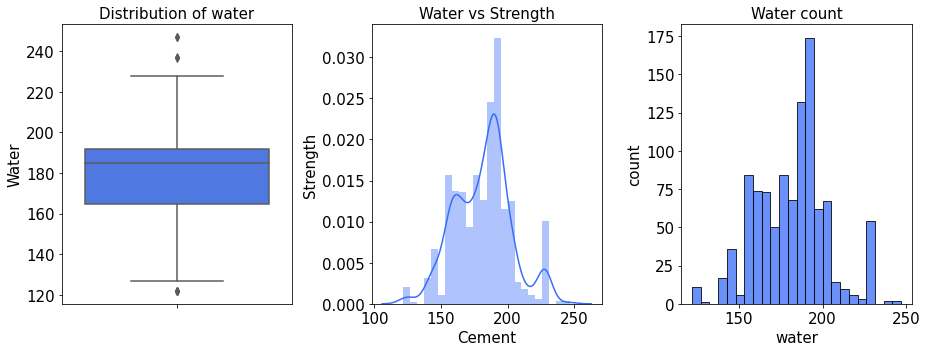

In [12]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['water'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['water'])
ax3.set_xlabel('water', fontsize=15)
ax3.set_ylabel('count', fontsize=15)
ax3.set_title('Water count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

5. **Superplastic**

In [13]:
print("Name of the attribute:", df.columns[4])
print("Range of values:", (df['superplastic'].max()-df['superplastic'].min()))
print("Mean value:", df['superplastic'].mean())
print("Median value:", df['superplastic'].median())
print("Standard deviation value:", df['superplastic'].std())
print("Quartiles values:")
print("1st Quartile", df['superplastic'].quantile(q=0.25))
print("3rd Quartile", df['superplastic'].quantile(q=0.75))

Name of the attribute: superplastic
Range of values: 32.2
Mean value: 6.204660194174756
Median value: 6.4
Standard deviation value: 5.973841392485508
Quartiles values:
1st Quartile 0.0
3rd Quartile 10.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


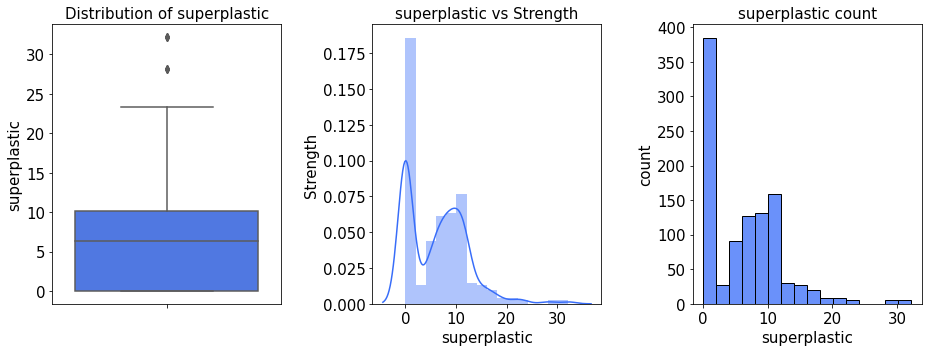

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='superplastic',data=df,orient='v',ax=ax1)
ax1.set_ylabel('superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['superplastic'],ax=ax2)
ax2.set_xlabel('superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['superplastic'])
ax3.set_xlabel('superplastic', fontsize=15)
ax3.set_ylabel('count', fontsize=15)
ax3.set_title('superplastic count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

6. Coarseagg

In [15]:
print("Name of the attribute:", df.columns[5])
print("Range of values:", (df['coarseagg'].max()-df['coarseagg'].min()))
print("Mean value:", df['coarseagg'].mean())
print("Median value:", df['coarseagg'].median())
print("Standard deviation value:", df['coarseagg'].std())
print("Quartiles values:")
print("1st Quartile", df['coarseagg'].quantile(q=0.25))
print("3rd Quartile", df['coarseagg'].quantile(q=0.75))

Name of the attribute: coarseagg
Range of values: 344.0
Mean value: 972.918932038835
Median value: 968.0
Standard deviation value: 77.75395396672087
Quartiles values:
1st Quartile 932.0
3rd Quartile 1029.4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


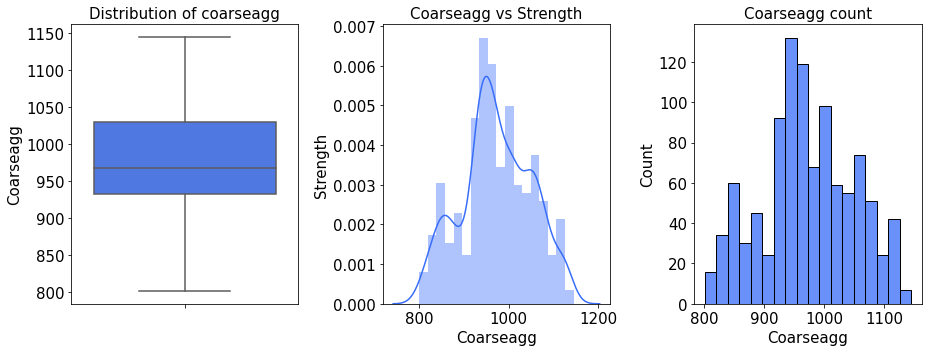

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.set_title('Coarseagg count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

7. **Fineagg**

In [17]:
print("Name of the attribute:", df.columns[6])
print("Range of values:", (df['fineagg'].max()-df['fineagg'].min()))
print("Mean value:", df['fineagg'].mean())
print("Median value:", df['fineagg'].median())
print("Standard deviation value:", df['fineagg'].std())
print("Quartiles values:")
print("1st Quartile", df['fineagg'].quantile(q=0.25))
print("3rd Quartile", df['fineagg'].quantile(q=0.75))

Name of the attribute: fineagg
Range of values: 398.6
Mean value: 773.5804854368932
Median value: 779.5
Standard deviation value: 80.17598014240443
Quartiles values:
1st Quartile 730.9499999999999
3rd Quartile 824.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


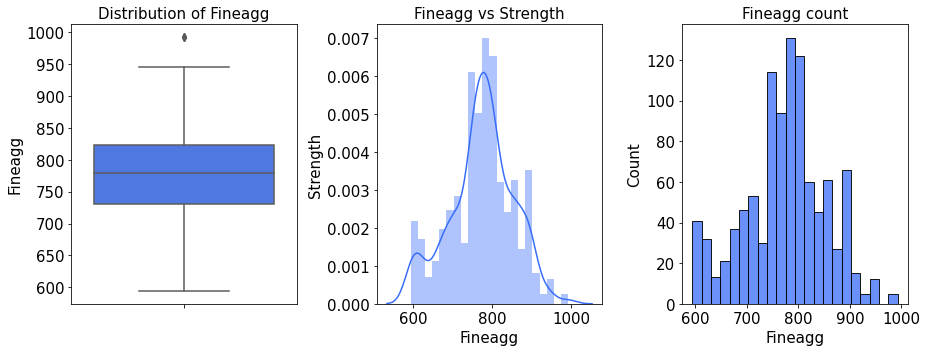

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='fineagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of Fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.set_title('Fineagg count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

8. **Age**

In [19]:
print("Name of the attribute:", df.columns[7])
print("Range of values:", (df['age'].max()-df['age'].min()))
print("Mean value:", df['age'].mean())
print("Median value:", df['age'].median())
print("Standard deviation value:", df['age'].std())
print("Quartiles values:")
print("1st Quartile", df['age'].quantile(q=0.25))
print("3rd Quartile", df['age'].quantile(q=0.75))

Name of the attribute: age
Range of values: 364
Mean value: 45.662135922330094
Median value: 28.0
Standard deviation value: 63.16991158103279
Quartiles values:
1st Quartile 7.0
3rd Quartile 56.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


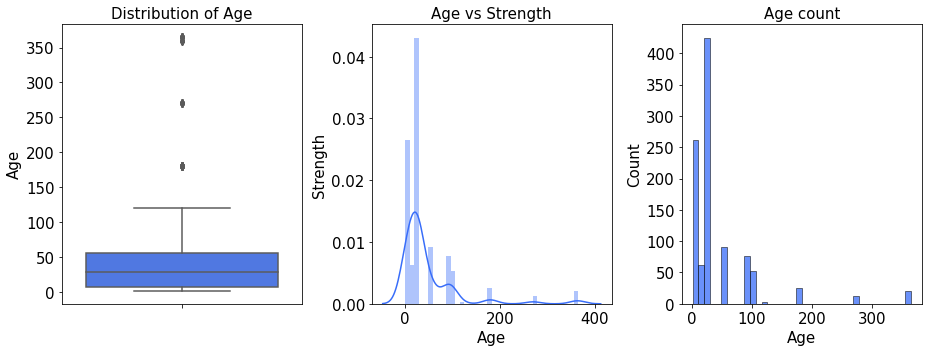

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(y='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of Age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
sns.histplot(df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.set_title('Age count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# MULTIVARIATE ANALYSIS

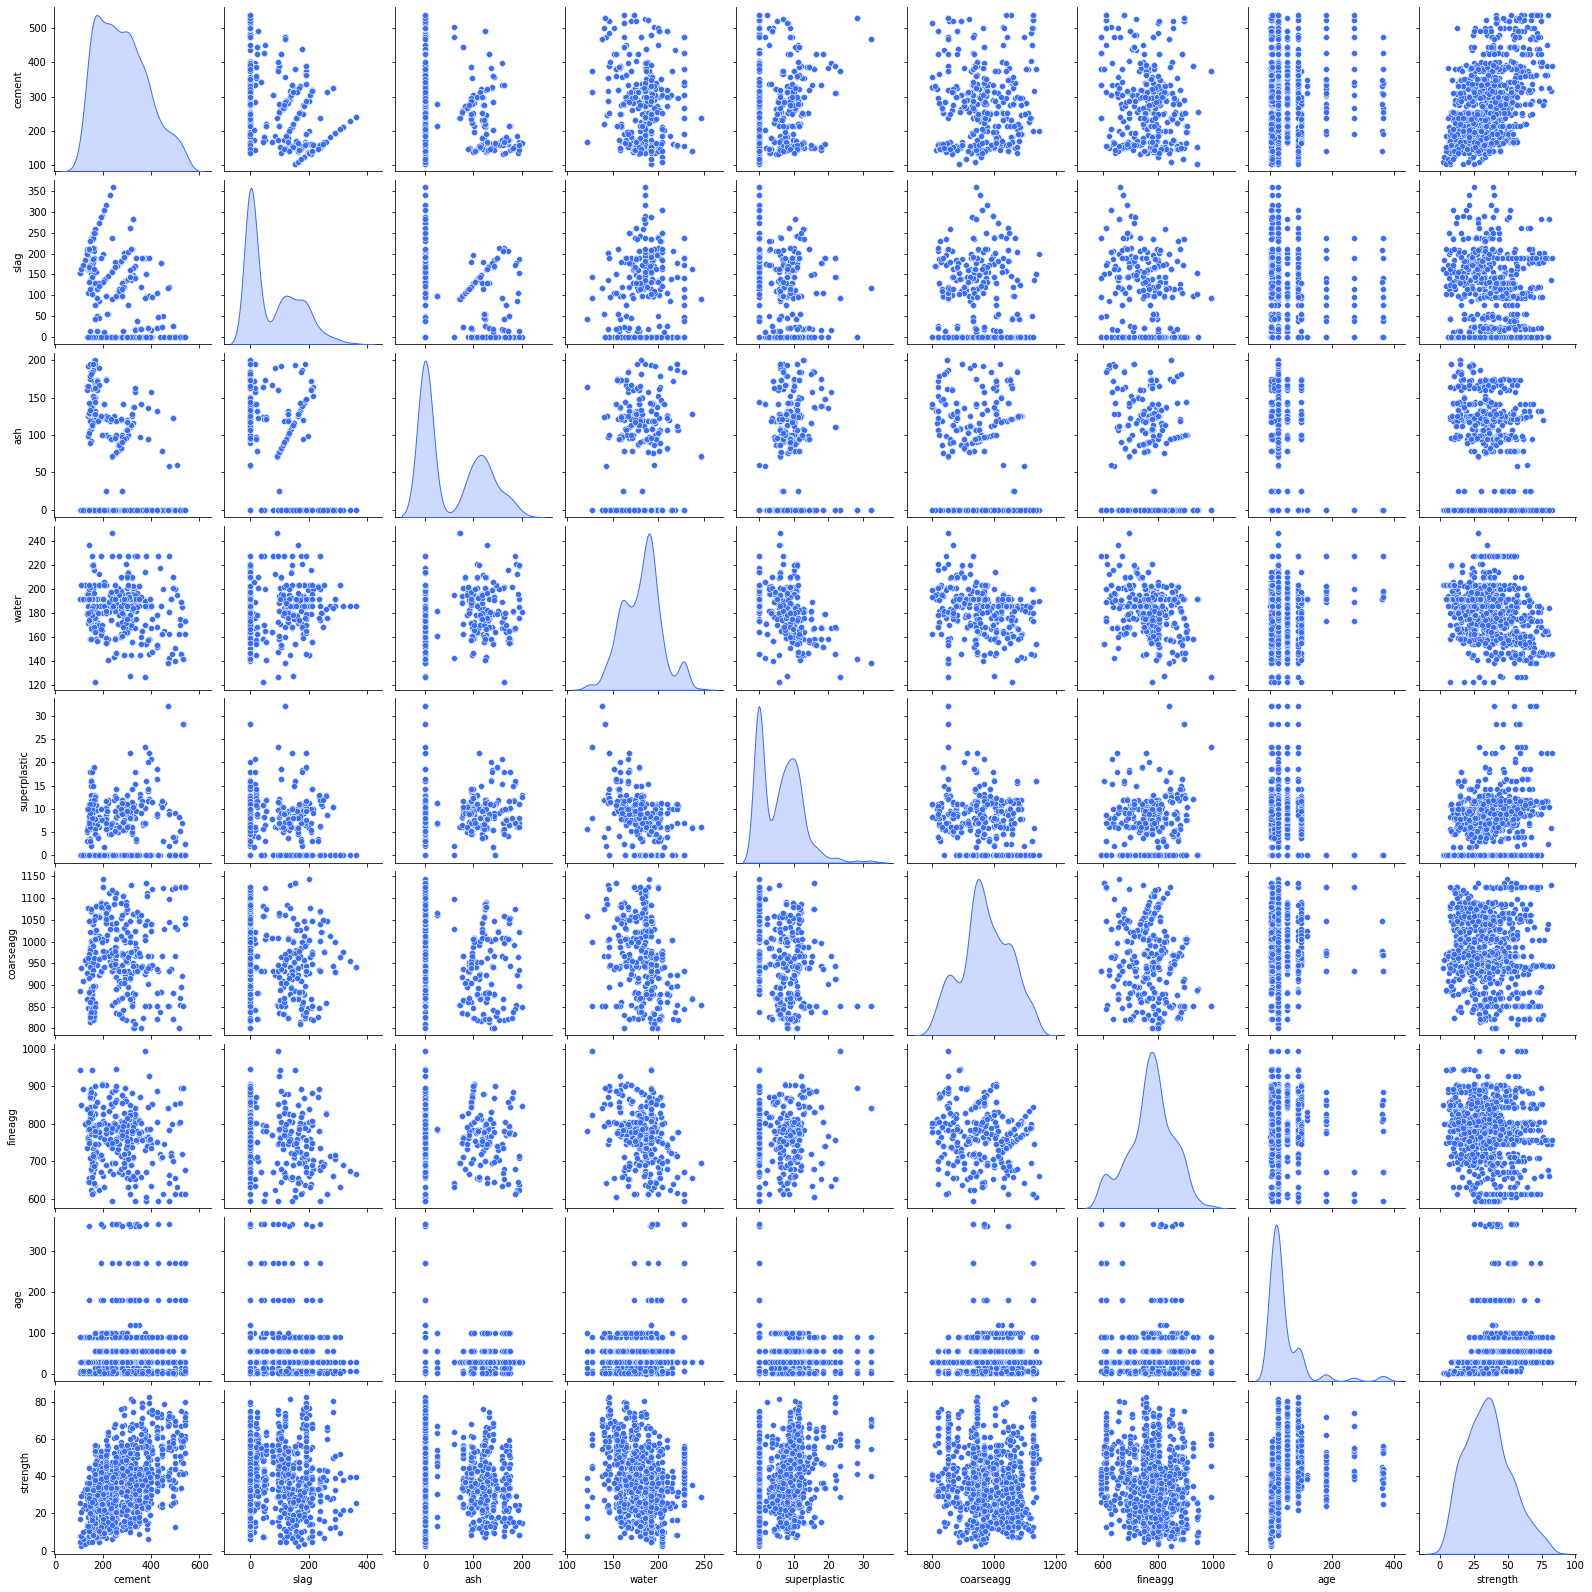

In [21]:
sns.pairplot(df, diag_kind= 'kde', palette='Pastel2')

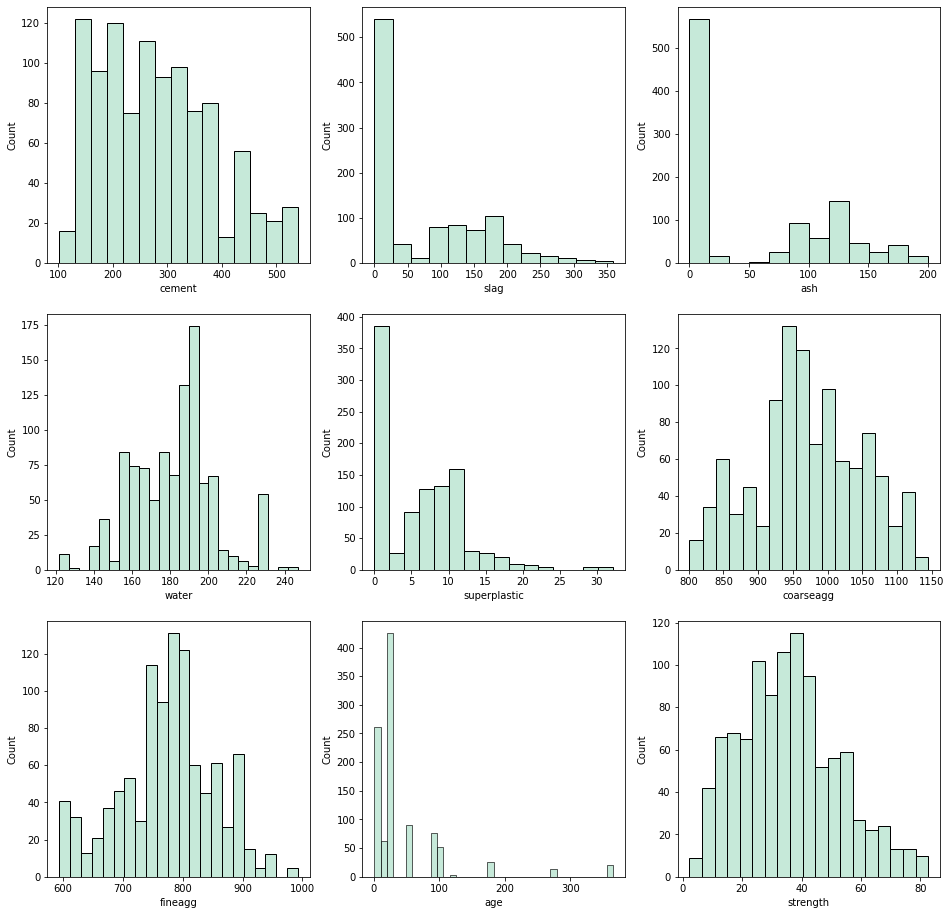

In [22]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.set_palette('Pastel2')
sns.histplot(df['cement'],ax=ax2[0][0])
sns.histplot(df['slag'],ax=ax2[0][1])
sns.histplot(df['ash'],ax=ax2[0][2])
sns.histplot(df['water'],ax=ax2[1][0])
sns.histplot(df['superplastic'],ax=ax2[1][1])
sns.histplot(df['coarseagg'],ax=ax2[1][2])
sns.histplot(df['fineagg'],ax=ax2[2][0])
sns.histplot(df['age'],ax=ax2[2][1])
sns.histplot(df['strength'],ax=ax2[2][2])

*Conclusion that can be drawn from bi-variate analysis:*

* cement and strength are the 2 attributes which looks more normal than other attributes
* slag, ash, superplastic, age are the attributes which are rightly skewed.
* Except cement and strength all other attributes have multiple/ more than one Gaussians.

* from the joint plots we can plotted and individual attribute's boxplots which were plotted before are the evidences that there are outliers present in the attributes: slag, ash, superplastic, fineagg, age

* The above heatmap shows that there aren't any missing values in the data.
* So no furhter imputations are needed as there aren't any missing values.

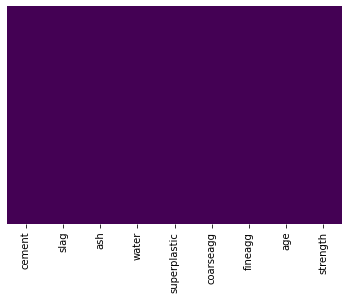

In [23]:
sns.heatmap(df.isna(), yticklabels= False, cbar= False, cmap = 'viridis')

*Relationship between the dependent and independent variables:*

In [24]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Text(0.5, 1.0, 'Correlation between the variables')

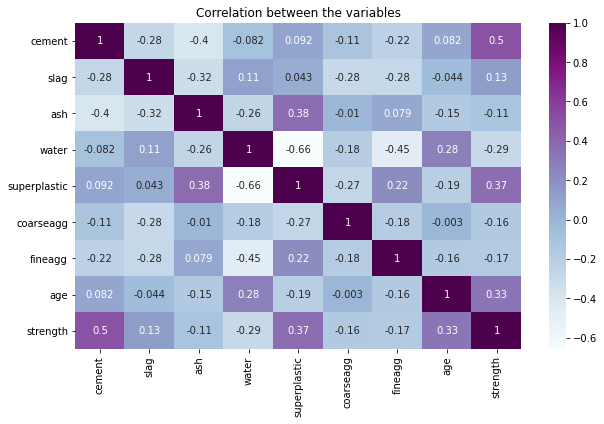

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, cmap='BuPu', linecolor='black')
plt.title("Correlation between the variables")

* Strength vs Cement: is highly positively correlated, it's also linearly related
* Strength vs Slag: is positively correalted with less degree of correaltion
* Strength vs Ash: is negatively correlated of almost -0.2
* Strength vs Water:- Negatively correalted and poorly realted to dependent variable
* Strength vs Superplastic: positive and fairly correalted of almost 0.4
* Strength vs coarseagg/fineagg : negatively correalted
* Strength vs age: positively and fairly correalted

# FETURE ENGINEERING, BUIDING MODELS AND MODEL TUNING

Scaling the varaibles in the data

In [26]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_df = scaler.transform(df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']])
scaled_df[:5]

array([[-1.33901711,  1.60144087, -0.84714393,  1.02758961, -1.03914281,
        -0.01439767, -0.31296991, -0.27973311, -0.35501811],
       [-1.07479007, -0.36754132,  1.09607803, -1.09011643,  0.76961738,
         1.38814131,  0.28226038, -0.50146528, -0.73710825],
       [-0.29838379, -0.85688789,  0.64896501,  0.27327396, -0.11801494,
        -0.20612089,  1.09337085, -0.27973311, -0.39514356],
       [-0.14520869,  0.46504362, -0.84714393,  2.17546125, -1.03914281,
        -0.52651741, -1.29254178, -0.27973311,  0.60080614],
       [-1.20977562,  1.26979841, -0.84714393,  0.54970019,  0.48490513,
         0.95837249, -0.95936256, -0.27973311, -1.04972746]])

In [29]:
df_new = pd.DataFrame(scaled_df, columns= df.columns)
df_new.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


Split the data

In [30]:
X = df_new[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']]
y = df_new['strength']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [32]:
X_train[:5]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.856888,-0.847144,1.004164,-1.039143,0.013910,0.017714,-0.501465
286,0.888723,1.337055,-0.847144,-0.537264,0.652383,-0.602435,-0.210645,0.718062
600,-0.039901,-0.856888,-0.847144,0.441941,-1.039143,-0.063294,1.028482,-0.675683
691,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.612331
474,0.716401,-0.856888,1.372788,0.535645,0.803113,-2.212138,0.055149,-0.279733


In [33]:
y_train[:5]

185   -0.795799
286    1.741687
600   -1.464756
691   -0.179544
474    0.302560
Name: strength, dtype: float64

**Algorithm**:- *Linear Regression*

In [34]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression() #initialize
linear_reg.fit(X_train, y_train) # training the model
linear_reg_pred = linear_reg.predict(X_test)

In [35]:
from sklearn import metrics
linear_reg_r2 = metrics.r2_score(y_test, linear_reg_pred)
print("R^2 Score:", linear_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, linear_reg_pred))

R^2 Score: 0.6339136715208274
Mean Squared Error: 0.38214294489585104


**Algorithm**:- *Decision Tree Regressor*

In [36]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor()  #intialize
decision_reg.fit(X_train, y_train)  # training
decision_reg_pred = decision_reg.predict(X_test)

In [38]:
decision_reg_r2 = metrics.r2_score(y_test, decision_reg_pred)
print("R^2 Score:", decision_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, decision_reg_pred))

R^2 Score: 0.8623792517625698
Mean Squared Error: 0.14365682058846424


**Algorithm**:- *Random Forest Regressor*

In [39]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()  #intialize
random_reg.fit(X_train, y_train)  # training
random_reg_pred = random_reg.predict(X_test)

In [41]:
random_reg_r2 = metrics.r2_score(y_test, random_reg_pred)
print("R^2 Score:", random_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, random_reg_pred))

R^2 Score: 0.9030101286201521
Mean Squared Error: 0.10124386569730516


**Algorithm**:- *Stochastic Gradient Descent Regressor*

In [42]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()  #intialize
sgd_reg.fit(X_train, y_train)  # training
sgd_reg_pred = sgd_reg.predict(X_test)

In [43]:
sgd_reg_r2 = metrics.r2_score(y_test, sgd_reg_pred)
print("R^2 Score:", sgd_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, sgd_reg_pred))

R^2 Score: 0.6329243011914458
Mean Squared Error: 0.3831757091971925


**Algorithm**:- *Gradient Boosting Regressor*

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_reg = GradientBoostingRegressor()  # intialize
gradient_boost_reg.fit(X_train, y_train)  # training
gradient_boost_reg_pred = gradient_boost_reg.predict(X_test)

In [45]:
gradient_boost_reg_r2 = metrics.r2_score(y_test, gradient_boost_reg_pred)
print("R^2 Score:", gradient_boost_reg_r2)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, gradient_boost_reg_pred))

R^2 Score: 0.9033719219345797
Mean Squared Error: 0.1008662040588787


Hyper Parameter Tuning of Random Forest Regressor

In [46]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[50,100,150,200], 'criterion':['mse','mae'], 'max_depth':[None, 10,20,30,100], 'bootstrap':[True, False]}
grid_model = GridSearchCV(RandomForestRegressor(), params, verbose=3, )

In [48]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=50 ..
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=50, score=0.906, total=   0.1s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=50 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=50, score=0.874, total=   0.1s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=50 ..
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=50, score=0.836, total=   0.1s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=50 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=50, score=0.897, total=   0.1s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=50 ..
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=50, score=0.894, total=   0.1s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=100 .
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=100, score=0.905, total=   0.3s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=100 .
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=100, score=0.865, total=   0.3s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=100 .
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=100, score=0.848, total=   0.3s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estimators=100 .
[CV]  bootstrap=True, criterion=mse, max_depth=None, n_estimators=100, score=0.900, total=   0.3s
[CV] bootstrap=True, criterion=mse, max_depth=None, n_estim

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  8.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [49]:
grid_model.best_params_

{'bootstrap': True, 'criterion': 'mae', 'max_depth': 30, 'n_estimators': 50}

In [53]:
random_reg_grid = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=30, n_estimators=50)  #intialize
random_reg_grid.fit(X_train, y_train)  # training
random_reg_grid_pred = random_reg_grid.predict(X_test)

In [54]:
random_reg_grid_r2 = metrics.r2_score(y_test, random_reg_grid_pred)
print("R^2 Score:", random_reg_grid_r2)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, random_reg_grid_pred))

R^2 Score: 0.9020917588488261
Mean Squared Error: 0.10220251534252896


MODEL ACCURACIES

In [62]:
accuracy = pd.DataFrame({'Method':['Linear regression','Decision Tree Regressor','Random Forest Regressor', 'Stochastic Gradient Descent Regressor', 'Gradient Boosting Regressor', 'Hyper Parameter tuned Random Forest Regressor'],
                         'R^2 Scores':[linear_reg_r2, decision_reg_r2, random_reg_r2, sgd_reg_r2, gradient_boost_reg_r2,random_reg_grid_r2]})
accuracy

,Method,R^2 Scores
0,Linear regression,0.633914
1,Decision Tree Regressor,0.862379
2,Random Forest Regressor,0.903010
3,Stochastic Gradient Descent Regressor,0.632924
4,Gradient Boosting Regressor,0.903372
5,Hyper Parameter tuned Random Forest Regressor,0.902092


From the table above we conclude that:
* Random Forest Regressor, Gradient Boosting Regressor and hyper parameter tuned Random Forest Regressor have the highest r2 scores as comapred to other algorithms like Linear Regression, Decision Tree Regressor, Stochastic Gradient Descent